# implement simple-Recurrent-Neural-Network
## predict: sine wave

# import Library

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable
import itertools

%matplotlib inline

# Create Architecture (Recurrent-Neural-Network)

In [2]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, outputs_size):
        super(RNN,self).__init__()
        inputs = input_size + hidden_size
        
        self.w_ih = nn.Linear(input_size+hidden_size, hidden_size)
        self.w_ho = nn.Linear(hidden_size, outputs_size)
        
    #x: input_vector
    #h0: previous_state
    def forward(self, x, h0):
        inputs = torch.cat((x,h0))
        state = self.w_ih(inputs)
        outputs = self.w_ho(state)
        
        return outputs, state

# Prepare datasets

In [3]:
class DataLoader():
    def __init__(self, seq_length):
        x_ = np.array([np.sin(np.pi * i / 8) for i in range(seq_length)])
        y_ = np.array([np.sin(np.pi*(i+1) / 8) for i in range(seq_length)])
        
        self.x = x_
        self.y = y_
        self.length = len(x_)
        self.counter = 0
        
    def next_data(self):
        x, y = self.x[self.counter],self.y[self.counter]
        self.counter = (self.counter + 1) % self.length
        
        return torch.Tensor([x]), torch.Tensor([y])
    
    def init_data(self):
        return torch.Tensor([self.x[0]])
    
    def get_train_data(self):
        return torch.Tensor(self.x)

# Define some parameters
## Predict sine wave: input x(t=n-1) and outputs x(t=n)

In [4]:
#hyper parameter
epochs = 200
seq_length = 50
input_size = 1
hidden_size = 5
output_size = 1

In [5]:
data_loader = DataLoader(seq_length)
model = RNN(input_size, hidden_size, output_size)
criterion = torch.nn.MSELoss()
optimizer = optim.SGD(model.parameters(),lr = 0.001,momentum=0.9)

# Run training

In [6]:
#train
model.train()
for epoch in range(epochs):
    state = torch.zeros(hidden_size)
    total_loss = 0
    loss = 0
    optimizer.zero_grad()
    for i in range(seq_length):
        optimizer.zero_grad()
        x, y = data_loader.next_data()
        outputs, state = model(x, state)
        
        loss += criterion(outputs, y)
    
    total_loss += loss.item()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 50 == 0:
        print("epoch:{} loss: {}".format(epoch+1, total_loss))

epoch:50 loss: 0.31403836607933044
epoch:100 loss: 0.059937313199043274
epoch:150 loss: 0.01472063921391964
epoch:200 loss: 0.003518093843013048


# Check
## input x(t=0)

In [7]:
y = []
model.eval()
state = torch.zeros(hidden_size)
output = torch.Tensor(data_loader.init_data())
y.append(output)
for i in range(seq_length):
    output,state = model(output,state)
    y.append(output.data.numpy())

# Show prediction and ground-truth

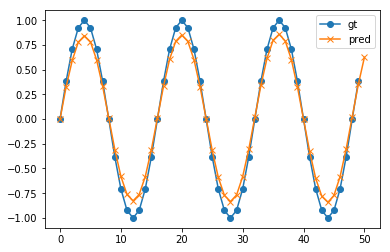

In [8]:
plt.plot(data_loader.get_train_data().data.numpy(),marker="o",label="gt")
plt.plot(y,marker="x",label="pred")
plt.legend()
plt.show()